In [1]:
cd /orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001c/object

/orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001c/object


In [2]:
import glob
#files = [x for x in glob.glob("*.fits") if "STARE" in x]
files = !ls *fits

In [3]:
len(files)

364

In [14]:
files[200]

'0002613983-20200712-EMIR-STARE_IMAGE_raw.fits'

In [29]:
from astropy.io import fits
filehandle = fits.open(files[182])
filehandle

In [30]:
filehandle[0].header['FILTER']

'H'

In [17]:
filehandle[0].header['OBJECT']

'W51A'

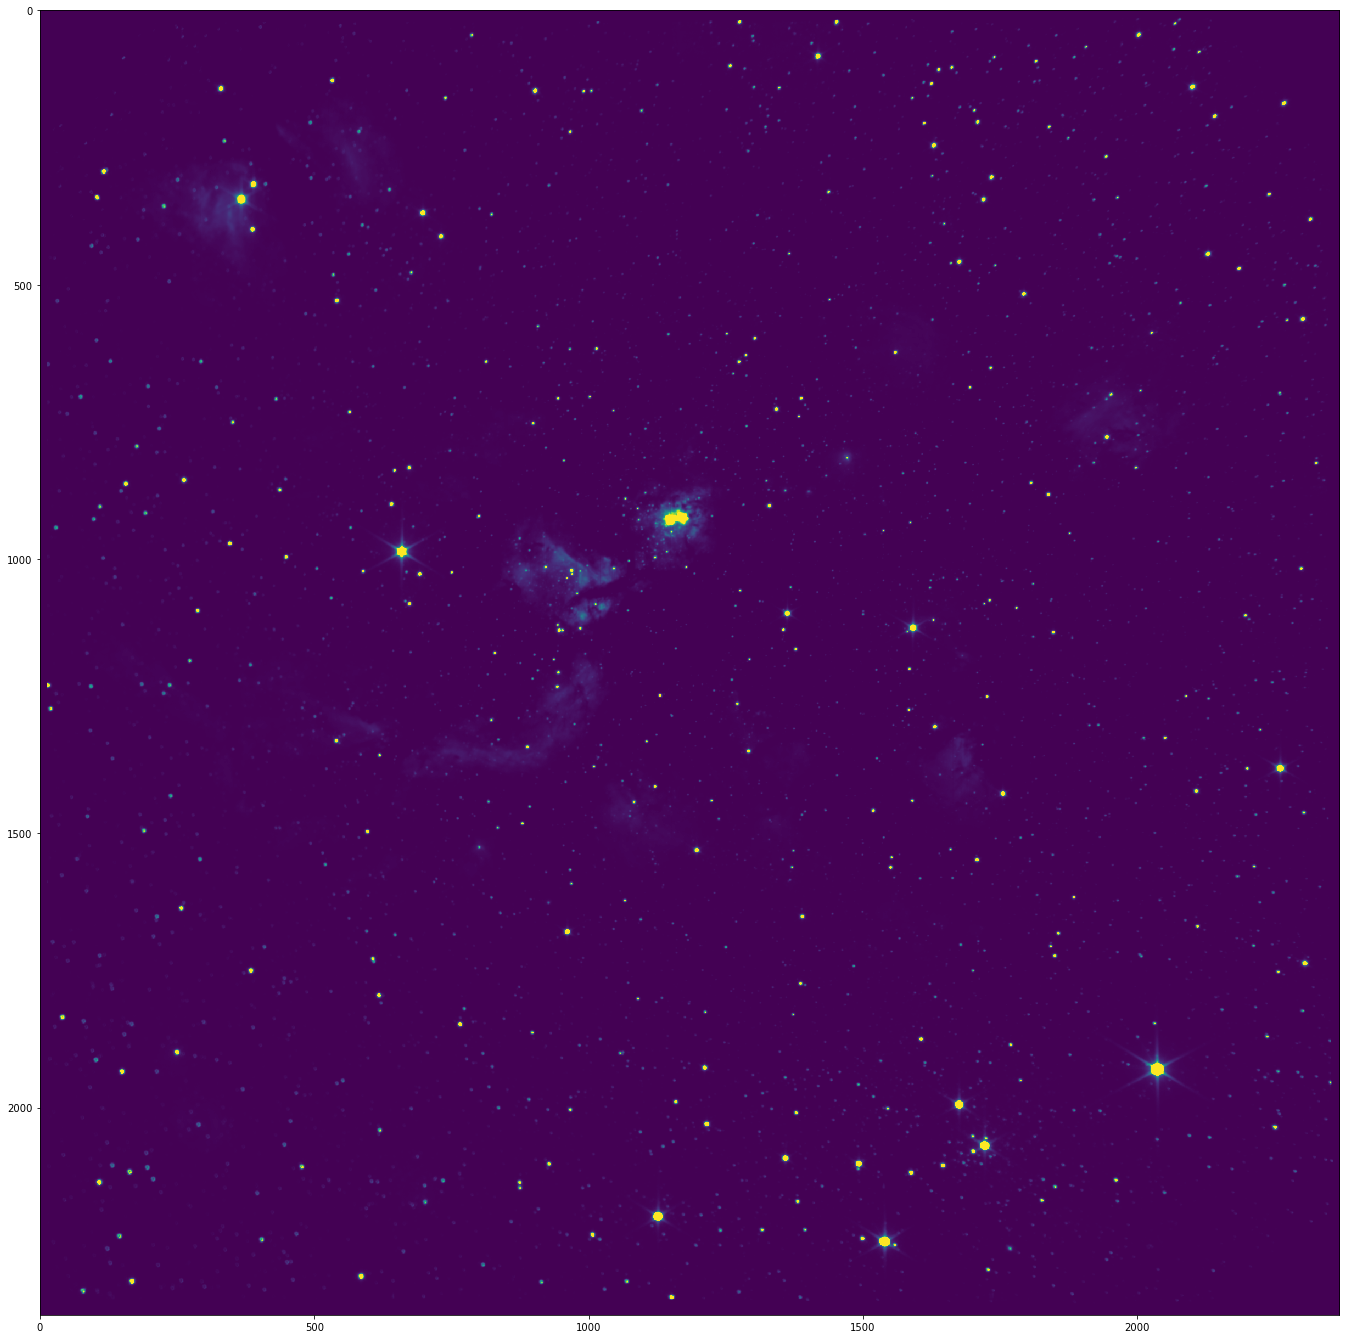

In [75]:
pl.figure(figsize=(24,24))
pl.imshow(filehandle[0].data, vmin=0, vmax=7000)

In [46]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points

from wcsFunction import findwcs

In [52]:
testfile = fits.open(files[25])

new_wcs, starcat, table_coordinates = findwcs(testfile)

(-0.5, 2047.5, -0.5, 2047.5)

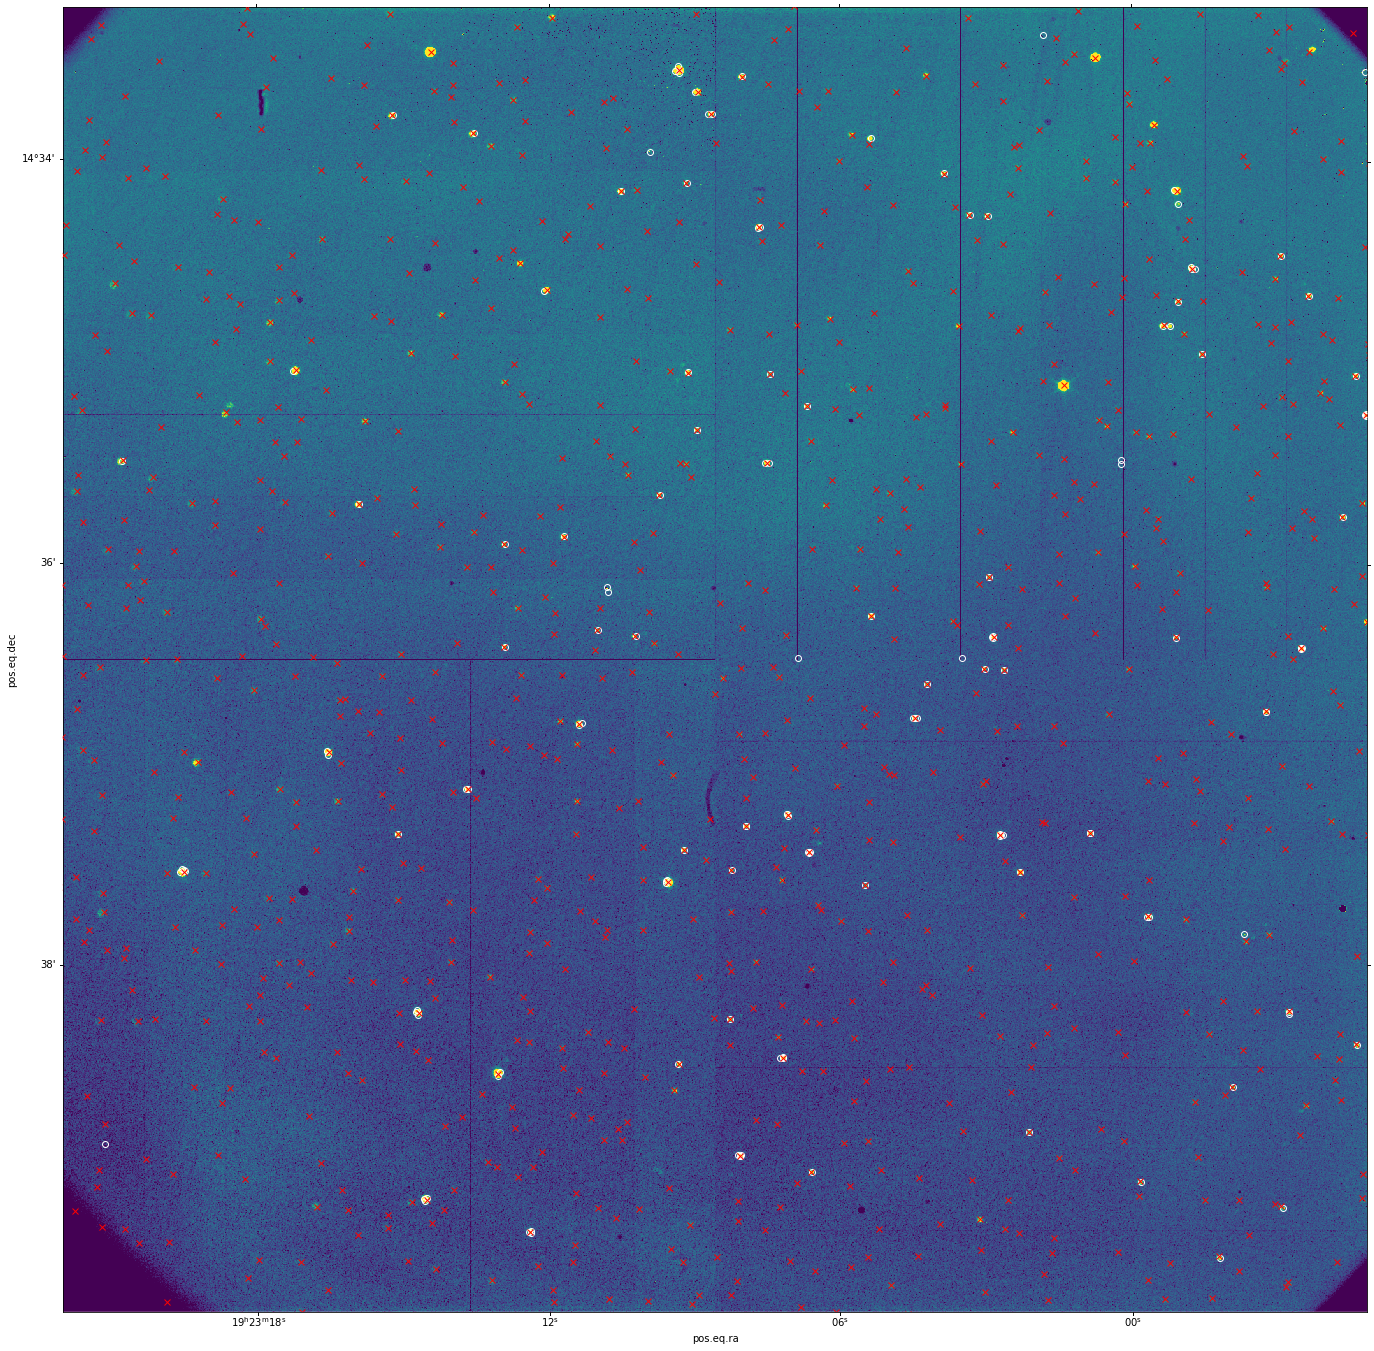

In [53]:
pl.figure(figsize=(24,24))
ax = pl.subplot(projection=new_wcs)
pl.imshow(testfile[0].data, norm=visualization.simple_norm(testfile[0].data, min_percent=1, max_percent=99.9))
axlims = ax.axis()
pl.plot(starcat['xcentroid'], starcat['ycentroid'], 'wo', markeredgecolor='w', markerfacecolor='none')
pl.plot(table_coordinates.ra,
        table_coordinates.dec,
        transform=ax.get_transform('world'), marker='x', color='r', linestyle='none')
ax.axis(axlims)